#  Interactions at baits

In this Jupyter notebook, the classes ``BaitedDigest`` and ``BaitedDigestSet`` are demonstrated.

The class ``BaitedDigest`` can be used to group interactions according to the baits in which they end. Within this class, interactions are further differntiated according to interaction category (``DI``, ``UIR``, ``UI`` and ``ALL``) and the enrichment status of the two digests (``NE`` and ``EN``). Interactions with the enrichment state `NN` or ``EE`` cannot be assigned unabgiuously to a baited digests and, therefore, are not taken into account. However, for capture Hi-C data, such interactions make up only a small percentage (around 10% on average).

The class ``BaitedDigestSet`` can be used to manage a number of ``BaitedDigest`` objects. At its core, it is a dictionary in which ``BaitedDigest`` objects are stored, with the coordinates of the digests serving as keys.

This structuring of the data enables properties of interactions that end in the same baited digest to be investigated and compared for the different interaction categories and enrichment states.

## Setting up the notebook

In [1]:
import sys
import os
import pandas
sys.path.append("..")
from diachr import DiachromaticInteractionSet
from diachr import BaitedDigest
from diachr import BaitedDigestSet

## Input file

We have prepared a small test file in ``Diachromatic11`` format (already contains the  interaction categories ``DI``, ``UIR`` and ``UI``) that only contains interactions on chromosome ``chr21`` and ``chr22``.

In [2]:
# Interactions on 'chr21' and 'chr22' only
INTERACTION_FILE = "../tests/data/baited_digests_d11_interaction_test_file.tsv.gz"
OUT_PREFIX = "TEST_FILE"

# 100,000 randomly selected interactions
#INTERACTION_FILE = "../tests/data/baited_digests_d11_interaction_test_file_2.tsv.gz"

# Real data without shuffling
#INTERACTION_FILE = "../stair_like_structure_minimal/JAV_MAC_M1_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"

# Interactions on all chromosomes
#INTERACTION_FILE = "../DICer_interactions/JAV_MK_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_ERY_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NEU_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MON_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MAC_M0_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MAC_M1_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_MAC_M2_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_EP_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NB_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_TB_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_FOET_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NCD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_TCD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NACD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_ACD4_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_NCD8_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"
#INTERACTION_FILE = "../DICer_interactions/JAV_TCD8_RALT_20000_evaluated_and_categorized_interactions.tsv.gz"

INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_000001_evaluated_and_categorized_interactions.tsv.gz"
OUT_PREFIX = "JAV_MK_RALT_HTR_000001"

#INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_0001_evaluated_and_categorized_interactions.tsv.gz"
#OUT_PREFIX = "JAV_MK_RALT_HTR_0001"

#INTERACTION_FILE = "../ESTC/dicer/JAV_MK_RALT_HTR_025_evaluated_and_categorized_interactions.tsv.gz"
#OUT_PREFIX = "JAV_MK_RALT_HTR_025"

## Creation of a ``BaitedDigestSet``

First, we create a ``DiachromaticInteractionSet`` from the test file.

In [3]:
d11_interaction_set = DiachromaticInteractionSet()
d11_interaction_set.parse_file(i_file=INTERACTION_FILE, verbose=True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../ESTC/dicer/JAV_MK_RALT_HTR_000001_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Set size: 2,585,136
[INFO] ... done.


Optionally, interactions with digest pairs that are extreme in terms of length can be  removed.

In [4]:
#d11_interaction_set.remove_digest_length_outliers(dg_min_len = 500, dg_max_len = 10000, dg_min_len_q = 0.25, verbose =  True)

Then we shuffle the interactions and re-select undirected reference interactions (due to sorting artifact).

In [5]:
d11_interaction_set.shuffle_inter_dict(
    random_seed = 1,
    verbose = True)
report_dict = d11_interaction_set.select_reference_interactions_2(verbose=True)

[INFO] Shuffling dictionary with interactions ...
	[INFO] Random seed: 1
[INFO] ... done.
[INFO] Select reference interactions ...
	[INFO] Treating NE and EN as one category ...
	[INFO] First pass: Count directed interactions for different read pair counts ...
	[INFO] Second pass: Select undirected reference interactions for different read pair counts ...
[INFO] ... done.


Next, we create a ``BaitedDigestSet`` and pass the ``DiachromaticInteractionSet``.

In [6]:
baited_digest_set = BaitedDigestSet()
read_interactions_info_dict = baited_digest_set.ingest_interaction_set(d11_interaction_set, verbose=True)

[INFO] Reading interactions and group them according to chromosomes and baited digests ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Read 2,000,000 interactions ...
	[INFO] Total number of interactions read: 2,585,136
	[INFO] Total number of baited digests: 21,235
[INFO] ... done.


The function ``get_ingest_interaction_set_info_report()`` returns a string with more detailed information on the ingestion.

In [7]:
print(baited_digest_set.get_ingest_interaction_set_info_report())

[INFO] Report on ingestion of interactions:
	[INFO] Total number of interactions read: 2,585,136
	[INFO] Discarded NN and EE interactions: 132,013
	[INFO] Total number of ingested NE and EN interactions: 2,453,123
	[INFO] Broken down by interaction category and enrichment status: 
		[INFO] DI: 
			[INFO] NE: 388,881
			[INFO] EN: 393,874
		[INFO] UIR: 
			[INFO] NE: 376,381
			[INFO] EN: 374,310
		[INFO] UI: 
			[INFO] NE: 458,926
			[INFO] EN: 460,751
		[INFO] ALL: 
			[INFO] NE: 1,224,188
			[INFO] EN: 1,228,935
	[INFO] Total number of baited digests: 21,235
[INFO] End of report.



And the function ``get_ingest_interaction_set_table_row()`` returns the same information in table format.

In [8]:
print(baited_digest_set.get_ingest_interaction_set_table_row())

:TR_INGESTION:	TOTAL_INTERACTIONS_READ	DISCARDED	INGESTED	DI_NE	DI_EN	UIR_NE	UIR_EN	UI_NE	UI_EN	ALL_NE	ALL_EN	BAITED_DIGESTS
:TR_INGESTION:	2585136	132013	2453123	388881	393874	376381	374310	458926	460751	1224188	1228935	21235



### Explanation of the data structure

In the object ``baited_digest_set``, the chromosomes are first grouped according to chromosomes. For example, ``baited_digest_set._baited_digest_dict['chr21']`` all ``BaitedDigest`` object that were created for ``chr21``.

In [9]:
dict_all_baited_digest_objects_on_chr21 = baited_digest_set._baited_digest_dict['chr21']

A individual ``BaitedDigest`` object can be accessed via its digest coordinates.

In [10]:
individual_baited_digest_object_on_chr21 = baited_digest_set._baited_digest_dict['chr21']['chr21\t33167499\t33175012']

An ``BaitedDigest``, contains all interactions that end in this digest, spearted by interaction category and enrichment status. Here, as an example, an interaction of category ``DI`` with enricchment state ``NE``.

In [11]:
baited_digest_set._baited_digest_dict['chr21']['chr21\t33167499\t33175012'].interactions['DI']['NE'][0].get_category()

'DI'

In [12]:
baited_digest_set._baited_digest_dict['chr21']['chr21\t33167499\t33175012'].interactions['DI']['NE'][0].enrichment_status_tag_pair

'NE'

## Interaction BED files

In [13]:
baited_digest_set.write_bed_files_with_baited_interactions(
    out_prefix = 'bed_files/MK_RALT_HTR_CHR1',
    chromosomes=['chr1'])

## Number pairs at baits ``(NE, EN)``

The data structure with the ``BaitedDigest`` makes it easy to calculate number pairs ``(NE,EN)``  for each bait. We have determined number pairs of the following types:

1. Interaction numbers
2. Read pair numbers
3. Median distances

### Interaction number pairs

#### Determination of number pairs

The function ``baited_digest_set.get_number_pairs_at_baits()`` can be used to determine number pairs of all types. In order to determine pairs of interaction numbers, the function must be called with the argument ``number_pair_type='I_NUM'``. In addition, the analysis can be restricted to subsets of chromosomes by passing a list with the corresponding chromosome names.

The results are returned in form of a dictionary, which contains the number pairs, separated according to the different interaction categories. Furthermore, the dictionary contains a list of chromosomes that have been taken into account, the associated number of baits, and the type of the pairs (use ``i_num_pair_dict.keys()`` to explore the dictionary).

In [14]:
i_num_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='I_NUM',
    #chromosomes=['chr21', 'chr22'],
    verbose=True
)

[INFO] Determining pairs of interaction numbers (to the left and right) at baits ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chromosome chr20 ...
	[INF

#### Graphical representation of number pairs

The function ``get_pair_scatter_plots_with_histograms()`` can be used to graphically represent number pairs of any type. To do this, the previously created dictionary with the number pairs is passed to this function. In adddition, two text fields can be set and the name of the PDF file to which the plot will be written can be specified. There are two other function paramenters that are explained below along with the plot.

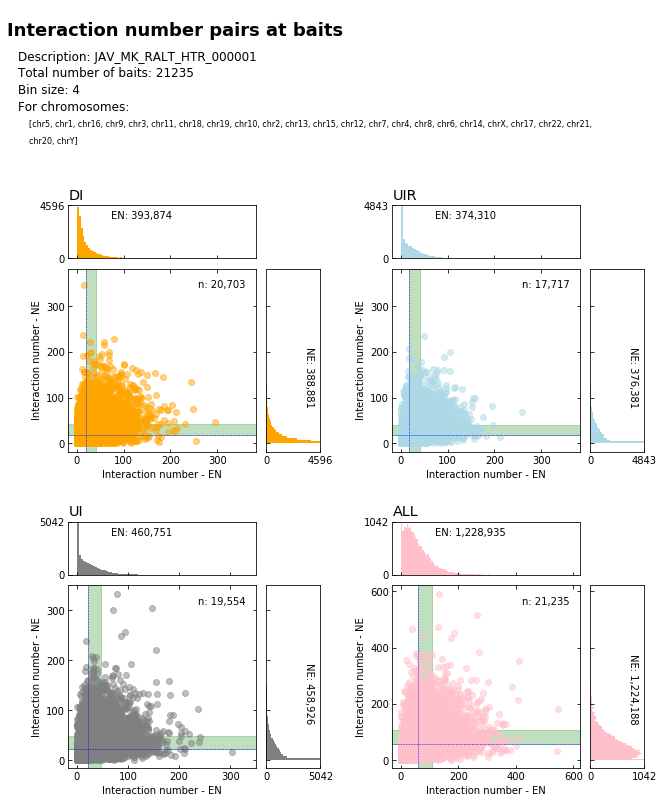

In [15]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = i_num_pair_dict,
    draw_mean_and_sd = True,
    #set_xy_max = 100,
    sup_title = 'Interaction number pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_i_num_pairs_scatter_plots_with_histograms.pdf'
)

### Read pair number pairs

In [16]:
rp_num_pairs_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='RP_NUM',
    #chromosomes=['chr22']
    verbose = True
)

[INFO] Determining pairs of read pair numbers (to the left and right) at baits ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chromosome chr20 ...
	[INFO]

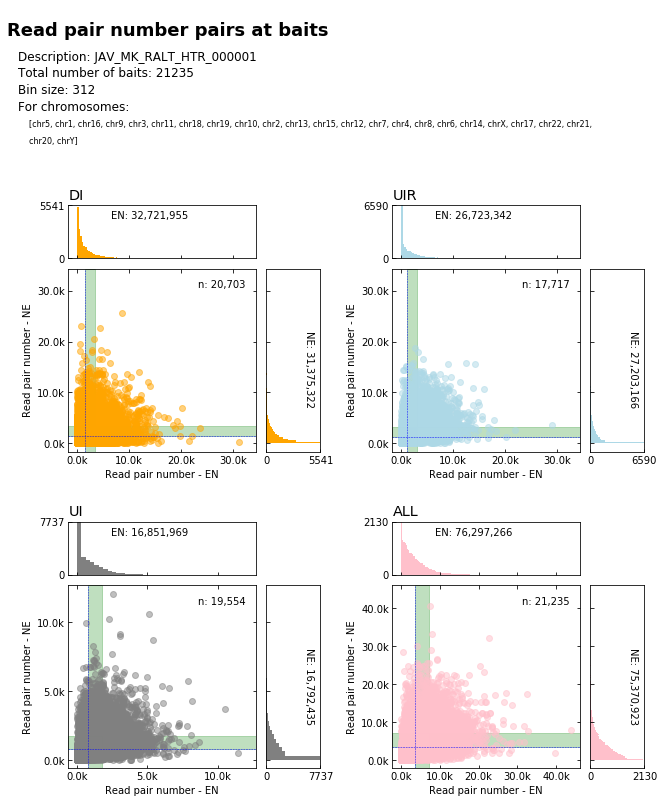

In [17]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = rp_num_pairs_dict,
    draw_mean_and_sd=True,
    sup_title = 'Read pair number pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_rp_num_pairs_scatter_plots_with_histograms.pdf'
)

### Median read pair number pairs

In [18]:
med_rp_num_pairs_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='MED_RP_NUM',
    #chromosomes=['chr22']
    verbose = True
)

[INFO] Determining pairs of median read pair numbers (to the left and right) at baits ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chromosome chr20 ...


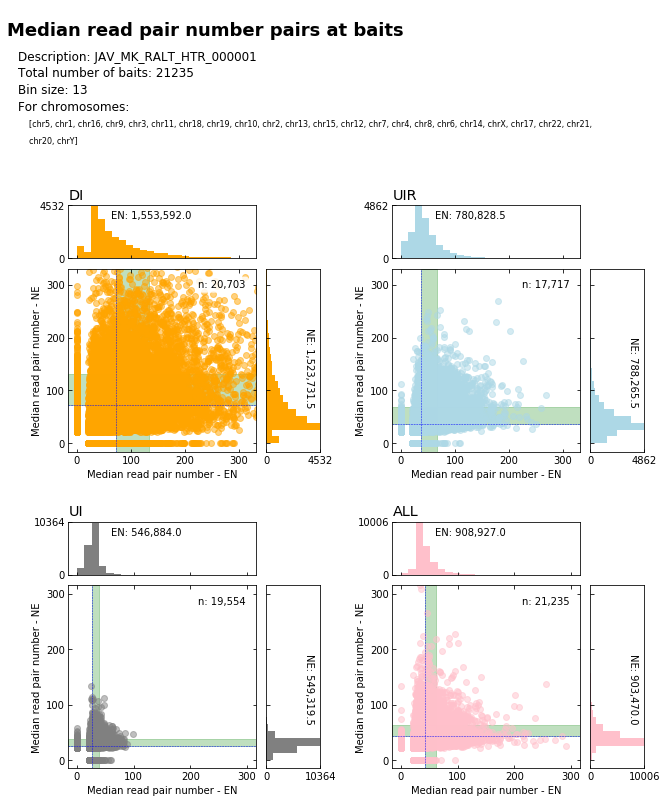

In [19]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = med_rp_num_pairs_dict,
    draw_mean_and_sd=True,
    set_xy_max = 300,
    sup_title = 'Median read pair number pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_med_rp_num_pairs_scatter_plots_with_histograms.pdf'
)

### Median distance pairs

In [20]:
med_i_dist_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='MED_I_DIST',
    #chromosomes=['chr22'],
    verbose = True
)

[INFO] Determining pairs of median interaction distances (to the left and right) at baits ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chromosome chr20 

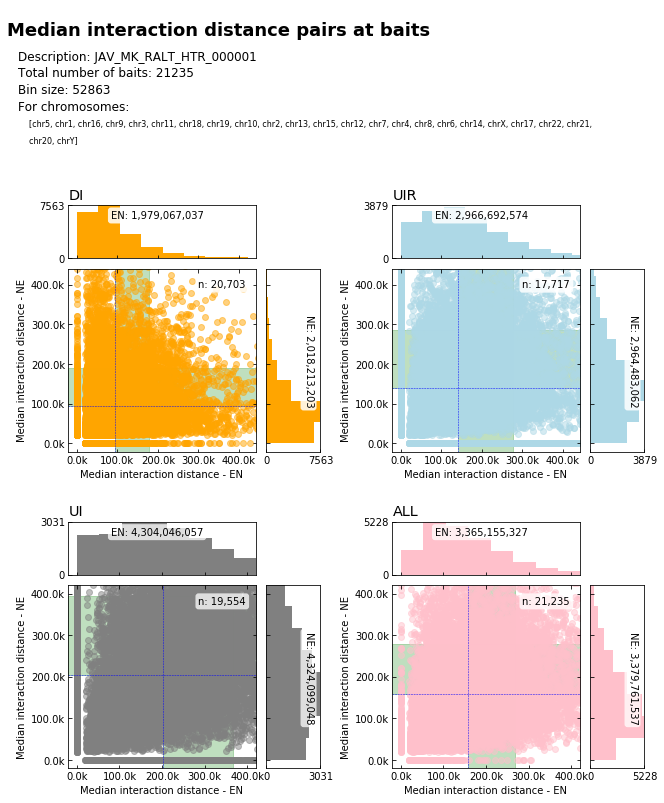

In [21]:
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = med_i_dist_pair_dict,
    draw_mean_and_sd=True,
    set_xy_max = 400000,
    sup_title = 'Median interaction distance pairs at baits',
    description = OUT_PREFIX,
    pdf_file_name = OUT_PREFIX + '_med_i_dist_pairs_scatter_plots_with_histograms.pdf'
)

### Digest lengths (provisionally)

Here, not `NE` and `EN` are compared, but the lengths of digest pairs of interactions. In this way, the framework with the `num_pair`  dictionary and the 2x2 grid of scatterplots can be used for a quick visulalization.

First, we reload the interactions because, above, we haad already filtered out interactions with extreme digest pairs.

In [22]:
d11_interaction_set = DiachromaticInteractionSet()
d11_interaction_set.parse_file(i_file=INTERACTION_FILE, verbose=True)

#d11_interaction_set.remove_digest_length_outliers(dg_min_len = 500, dg_max_len = 10000, dg_min_len_q = 0.25, verbose =  True)
#d11_interaction_set.remove_digest_length_outliers(dg_min_len = 0, dg_max_len = 500, dg_min_len_q = 0.25, verbose =  True)

d11_interaction_set.shuffle_inter_dict(random_seed = 1, verbose = True)
report_dict = d11_interaction_set.select_reference_interactions_2(verbose=True)
baited_digest_set = BaitedDigestSet()
read_interactions_info_dict = baited_digest_set.ingest_interaction_set(d11_interaction_set, verbose=True)

[INFO] Parsing Diachromatic interaction file ...
	[INFO] ../ESTC/dicer/JAV_MK_RALT_HTR_000001_evaluated_and_categorized_interactions.tsv.gz
	[INFO] Parsed 1,000,000 interaction lines ...
	[INFO] Parsed 2,000,000 interaction lines ...
	[INFO] Set size: 2,585,136
[INFO] ... done.
[INFO] Shuffling dictionary with interactions ...
	[INFO] Random seed: 1
[INFO] ... done.
[INFO] Select reference interactions ...
	[INFO] Treating NE and EN as one category ...
	[INFO] First pass: Count directed interactions for different read pair counts ...
	[INFO] Second pass: Select undirected reference interactions for different read pair counts ...
[INFO] ... done.
[INFO] Reading interactions and group them according to chromosomes and baited digests ...
	[INFO] Read 1,000,000 interactions ...
	[INFO] Read 2,000,000 interactions ...
	[INFO] Total number of interactions read: 2,585,136
	[INFO] Total number of baited digests: 21,235
[INFO] ... done.


A new number pair type `DIG_LEN` has been added to function `get_number_pairs_at_baits`.

In [23]:
dig_len_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='DIG_LEN',
    verbose=True
)

[INFO] Determining pairs of digest lengths (to the left and right) at baits ...
	[INFO] Processing chromosome chr5 ...
	[INFO] Processing chromosome chr1 ...
	[INFO] Processing chromosome chr16 ...
	[INFO] Processing chromosome chr9 ...
	[INFO] Processing chromosome chr3 ...
	[INFO] Processing chromosome chr11 ...
	[INFO] Processing chromosome chr18 ...
	[INFO] Processing chromosome chr19 ...
	[INFO] Processing chromosome chr10 ...
	[INFO] Processing chromosome chr2 ...
	[INFO] Processing chromosome chr13 ...
	[INFO] Processing chromosome chr15 ...
	[INFO] Processing chromosome chr12 ...
	[INFO] Processing chromosome chr7 ...
	[INFO] Processing chromosome chr4 ...
	[INFO] Processing chromosome chr8 ...
	[INFO] Processing chromosome chr6 ...
	[INFO] Processing chromosome chr14 ...
	[INFO] Processing chromosome chrX ...
	[INFO] Processing chromosome chr17 ...
	[INFO] Processing chromosome chr22 ...
	[INFO] Processing chromosome chr21 ...
	[INFO] Processing chromosome chr20 ...
	[INFO] Pr

The dictionary now contains pairs of digest lengths for each interaction in the various categories.

In [24]:
print(dig_len_pair_dict['DI']['NE'][0])
print(dig_len_pair_dict['DI']['EN'][0])

2047
6769


Now the medians of the lengths in the different categories can be easily calculated and compared.

In [25]:
from numpy import median, mean, quantile

print("Median of shorter digest lengths DI: " + str(median(dig_len_pair_dict['DI']['NE'])))
print("Median of longer digest lengths DI: " + str(median(dig_len_pair_dict['DI']['EN'])))
print()
print("Median of shorter digest lengths UIR: " + str(median(dig_len_pair_dict['UIR']['NE'])))
print("Median of longer digest lengths UIR: " + str(median(dig_len_pair_dict['UIR']['EN'])))
print()
print("Median of shorter digest lengths UI: " + str(median(dig_len_pair_dict['UI']['NE'])))
print("Median of longer digest lengths UI: " + str(median(dig_len_pair_dict['UI']['EN'])))
print()
print("Median of shorter digest lengths ALL: " + str(median(dig_len_pair_dict['ALL']['NE'])))
print("Median of longer digest lengths ALL: " + str(median(dig_len_pair_dict['ALL']['EN'])))

Median of shorter digest lengths DI: 2003.0
Median of longer digest lengths DI: 6862.0

Median of shorter digest lengths UIR: 1910.0
Median of longer digest lengths UIR: 6248.0

Median of shorter digest lengths UI: 1918.0
Median of longer digest lengths UI: 6388.0

Median of shorter digest lengths ALL: 1941.0
Median of longer digest lengths ALL: 6499.0


The quotients of the shorter and longer lengths can also be calculated and compared.

In [26]:
diq = []
for i in range(0,len(dig_len_pair_dict['DI']['NE'])):
    diq.append(dig_len_pair_dict['DI']['NE'][i]/dig_len_pair_dict['DI']['EN'][i])
print("Mean of quotiens of digest lengths DI: " + str(round(mean(diq),2)))
print("Quantiles of quotiens of digest lengths DI: " + str(quantile(diq, [0.25,0.50,0.75])))
print()
uirq = []
for i in range(0,len(dig_len_pair_dict['UIR']['NE'])):
    uirq.append(dig_len_pair_dict['UIR']['NE'][i]/dig_len_pair_dict['UIR']['EN'][i])
print("Mean of quotiens of digest lengths UIR: " + str(round(mean(uirq),2)))
print("Quantiles of quotiens of digest lengths UIR: " + str(quantile(uirq, [0.25,0.50,0.75])))
print()
uiq = []
for i in range(0,len(dig_len_pair_dict['UI']['NE'])):
    uiq.append(dig_len_pair_dict['UI']['NE'][i]/dig_len_pair_dict['UI']['EN'][i])
print("Mean of quotiens of digest lengths UI: " + str(round(mean(uiq),2)))
print("Quantiles of quotiens of digest lengths UI: " + str(quantile(uiq, [0.25,0.50,0.75])))
print()
allq = []
for i in range(0,len(dig_len_pair_dict['ALL']['NE'])):
    allq.append(dig_len_pair_dict['ALL']['NE'][i]/dig_len_pair_dict['ALL']['EN'][i])
print("Mean of quotiens of digest lengths ALL: " + str(round(mean(allq),2)))
print("Quantiles of quotiens of digest lengths ALL: " + str(quantile(allq, [0.25,0.50,0.75])))

Mean of quotiens of digest lengths DI: 0.38
Quantiles of quotiens of digest lengths DI: [0.14304652 0.32819706 0.59378869]

Mean of quotiens of digest lengths UIR: 0.4
Quantiles of quotiens of digest lengths UIR: [0.16282495 0.3482781  0.60943944]

Mean of quotiens of digest lengths UI: 0.39
Quantiles of quotiens of digest lengths UI: [0.1559133  0.34203464 0.60553964]

Mean of quotiens of digest lengths ALL: 0.39
Quantiles of quotiens of digest lengths ALL: [0.15389503 0.33961483 0.60310155]


Finally, the 2x2 grid with the scatterplots is created. We create the dictionary `dig_len_pair_dict` again for only one chromosome because otherwise the scatterplot would become too big.

[INFO] Determining pairs of digest lengths (to the left and right) at baits ...
	[INFO] Processing chromosome chr17 ...
[INFO] ... done.


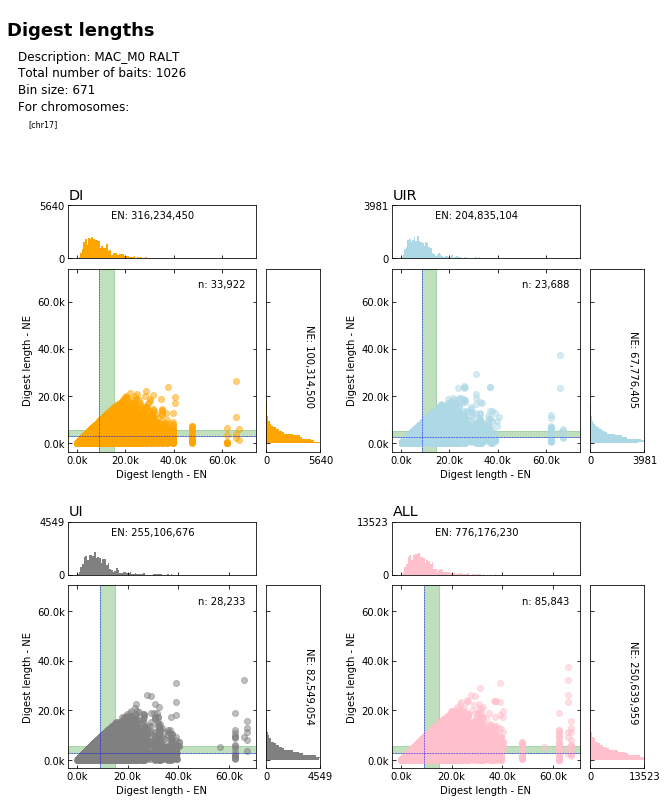

In [27]:
dig_len_pair_dict = baited_digest_set.get_number_pairs_at_baits(
    number_pair_type='DIG_LEN',
    chromosomes=['chr17'],
    verbose=True
)
fig = baited_digest_set.get_pair_scatter_plots_with_histograms(
    pairs_dict = dig_len_pair_dict,
    draw_mean_and_sd = True,
    #set_xy_max = 20000,
    sup_title = 'Digest lengths',
    description = 'MAC_M0 RALT',
    pdf_file_name ='MAC_M0_RALT_dig_len_pairs_scatter_plots_with_histograms.pdf'
)

To get an impression of the effects of filtering interactions with extreme digest pairs, repeat the analyzes from this section after uncommenting the relevant line (`remove_digest_length_outliers`) at the beginning.

## Proportion of directed interactions on individual chromosomes  (provisionally)

In [28]:
baited_digest_set.proportion_of_directed_interactions_on_individual_chromosomes()

1090
chr5	149026	43749	0.29	0.32	0.52	0.52
2194
chr1	257403	83626	0.32	0.31	0.5	0.5
689
chr16	52958	20398	0.39	0.27	0.49	0.48
840
chr9	98680	32620	0.33	0.3	0.49	0.51
1307
chr3	180812	54660	0.3	0.32	0.5	0.5
1353
chr11	146852	46435	0.32	0.31	0.49	0.51
343
chr18	47209	15151	0.32	0.3	0.48	0.49
961
chr19	44009	20374	0.46	0.23	0.51	0.51
899
chr10	114938	36514	0.32	0.31	0.5	0.5
1555
chr2	211121	64155	0.3	0.31	0.5	0.5
430
chr13	66128	17823	0.27	0.33	0.5	0.52
615
chr15	74817	24121	0.32	0.31	0.5	0.51
1158
chr12	136881	46474	0.34	0.3	0.48	0.48
975
chr7	120239	37288	0.31	0.31	0.49	0.48
921
chr4	130002	38745	0.3	0.31	0.5	0.51
875
chr8	115147	35219	0.31	0.31	0.48	0.49
1168
chr6	152280	47125	0.31	0.31	0.49	0.51
758
chr14	91648	27492	0.3	0.32	0.5	0.5
803
chrX	57919	16935	0.29	0.3	0.51	0.5
1026
chr17	85843	33922	0.4	0.28	0.5	0.5
408
chr22	31357	11081	0.35	0.29	0.52	0.51
255
chr21	30774	9206	0.3	0.3	0.48	0.47
596
chr20	56816	19528	0.34	0.29	0.49	0.5
16
chrY	264	114	0.43	0.22	0.54	0.32


## BaitedDigest key sorted by starting position (provisionally)

In [29]:
sorted_baited_digest_keys = baited_digest_set.get_baited_digest_keys_sorted_by_sta_pos()
for i in sorted_baited_digest_keys['chr1']:
    print(i)

chr1	896515	912788
chr1	912789	915238
chr1	915239	938701
chr1	954044	968260
chr1	968261	992014
chr1	992015	1001574
chr1	1008297	1021819
chr1	1069747	1098888
chr1	1161359	1171735
chr1	1171736	1174352
chr1	1174353	1187262
chr1	1225418	1271493
chr1	1271494	1277058
chr1	1304046	1342719
chr1	1348457	1370138
chr1	1374589	1377935
chr1	1428934	1437793
chr1	1437794	1450027
chr1	1598507	1610602
chr1	1610603	1617349
chr1	1777911	1798351
chr1	1889514	1899024
chr1	1911196	1920990
chr1	1996324	2024515
chr1	2049285	2060052
chr1	2173560	2191121
chr1	2212209	2215850
chr1	2224327	2234756
chr1	2388133	2392938
chr1	2404286	2420326
chr1	2423481	2426365
chr1	2455666	2485846
chr1	2488651	2494930
chr1	2519537	2526993
chr1	2526994	2564457
chr1	2583426	2594813
chr1	2624868	2633857
chr1	2780380	2794089
chr1	3011073	3028230
chr1	3068666	3072213
chr1	3122174	3143890
chr1	3453917	3466809
chr1	3554084	3564509
chr1	3606371	3614619
chr1	3614696	3628414
chr1	3649212	3660775
chr1	3665302	3674215
chr1	3674216	3721498
chr

chr1	61710669	61735718
chr1	61737302	61744151
chr1	61810944	61817058
chr1	61851096	61859439
chr1	62107808	62123940
chr1	62291410	62300941
chr1	62311970	62326081
chr1	62435645	62439004
chr1	62585956	62598882
chr1	62687536	62690378
chr1	62781775	62785297
chr1	62903130	62905276
chr1	63303897	63327226
chr1	63361117	63369209
chr1	63520086	63524060
chr1	63531499	63538406
chr1	63548708	63551922
chr1	63590679	63595296
chr1	63771141	63777144
chr1	64170682	64180695
chr1	64199407	64216242
chr1	64467577	64472530
chr1	64739699	64745801
chr1	64953285	64968436
chr1	65015637	65026600
chr1	65055753	65058792
chr1	65144712	65149671
chr1	65246729	65256203
chr1	65415148	65419596
chr1	65419612	65428943
chr1	65566785	65572171
chr1	65789846	65801064
chr1	66047148	66054125
chr1	66092538	66097949
chr1	66528501	66533892
chr1	66673209	66678212
chr1	66751799	66754945
chr1	66798727	66809543
chr1	66816804	66833222
chr1	66924076	66925798
chr1	67051891	67067725
chr1	67099937	67104628
chr1	67128201	67135294
chr1	671561

chr1	227560397	227564087
chr1	227940324	227948443
chr1	228006103	228017853
chr1	228077120	228084912
chr1	228097221	228105840
chr1	228108101	228123411
chr1	228138547	228167139
chr1	228198409	228211380
chr1	228211381	228214930
chr1	228266510	228268413
chr1	228399928	228414324
chr1	228414750	228422536
chr1	228423066	228425588
chr1	228449412	228462037
chr1	228468711	228494698
chr1	228512091	228523061
chr1	228734293	228739207
chr1	229227533	229228072
chr1	229247210	229253933
chr1	229270598	229272090
chr1	229303626	229304992
chr1	229310701	229319420
chr1	229341671	229343510
chr1	229374350	229393984
chr1	229426745	229436221
chr1	229530382	229541873
chr1	229557070	229561536
chr1	229623942	229627664
chr1	230044946	230051872
chr1	230056829	230057839
chr1	230268296	230271915
chr1	230278945	230285004
chr1	230421773	230428300
chr1	230630641	230643006
chr1	230713490	230719938
chr1	230743759	230747848
chr1	230855286	230873435
chr1	230873436	230875661
chr1	230895351	230895895
chr1	230974917	230994421
